# Prosper Loan Data Analysis
### by Ayush
## Preliminary Wrangling

This document is to perform preliminary on a comprehensive loan dataset that includes loan accounts current and completed along with the credit history details

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [134]:
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)
print(df.dtypes)
#df.head(10)

df.EstimatedLoss.value_counts()

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


0.1650    2586
0.1470    2365
0.0595    1837
0.1120    1786
0.0599    1742
0.0399    1692
0.0890    1615
0.0549    1607
0.1025    1593
0.0649    1541
0.0849    1532
0.0449    1532
0.0624    1506
0.0374    1503
0.0925    1431
0.0499    1377
0.0424    1369
0.0249    1366
0.1000    1333
0.0349    1317
0.0299    1304
0.0474    1285
0.1175    1255
0.0699    1244
0.1625    1239
0.1475    1236
0.0210    1233
0.0574    1208
0.0324    1199
0.0799    1190
          ... 
0.0130     110
0.2030     109
0.0325     106
0.2500      98
0.1725      96
0.1900      86
0.1950      80
0.0770      76
0.0880      70
0.3660      60
0.3450      50
0.0075      48
0.0700      45
0.1070      43
0.1460      37
0.0085      34
0.1180      26
0.1405      24
0.0410      22
0.1385      22
0.0965      19
0.1450      15
0.0135      15
0.0620      15
0.0765      14
0.0470      13
0.0950      12
0.0049      11
0.0840       9
0.1140       1
Name: EstimatedLoss, Length: 120, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [37]:
df['DebtToIncomeRatio'].max(),df['DebtToIncomeRatio'].min()

(10.01, 0.0)

In [38]:
#df['CreditScoreRangeLower'].value_counts()
df['LenderYield'].value_counts()
df['EstimatedReturn'].value_counts()
df['LoanOriginalAmount'].min()

1000

In [24]:
df['LoanStatus']= df['LoanStatus'].astype('category')
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
ordinal_var = { 'CreditScoreRangeUpper': np.arange(19.0,900.0),
                'CreditScoreRangeLower': np.arange(0.0,881.0),
                'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                'ProsperScore': [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0],
                'ProsperRating (numeric)':[1.0,2.0,3.0,4.0,5.0,6.0,7.0]
                }

for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var[var])
    df[var] = df[var].astype(ordered_var)

### What is the structure of your dataset?

> There are 113937 entries with 81 features in the dataset.This is a huge dataset in terms of scale and will be a challenge to analyze. Most variables in the dataset are numeric and floats as they deal with loan amounts, principal, interest and other loan related amounts including calculation of profit loss for Prosper and other metrics to keep track of the loan payments. The variables below are categorical and describe qualitative details of the debtor and qualitative details of the loan:

Debtor: LoanStatus, IncomeVerifiable,ProsperRating (numeric), ProsperRating (alpha), ProsperScore,CreditScoreRangeUpper


### What is/are the main feature(s) of interest in your dataset?

> I am interested in analyzing how the credit assessments made by Prosper impact the loan repayment. Also what factors impact the ability to pay the loans the most. 
> A secondary analysis can be related to performance of Propser in terms of their profit

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> IncomeVerifiable,ProsperRating (numeric), ProsperRating (alpha), ProsperScore,DebtToIncomeRatio,IncomeRange
TotalProsperLoans, ProsperPrincipalBorrowed,ProsperPrincipalOutstanding, LoanCurrentDaysDelinquent,  LoanOriginalAmount                          
> EstimatedEffectiveYield
EstimatedLoss
EstimatedReturn, LP_GrossPrincipalLoss LP_NonPrincipalRecoverypayments

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

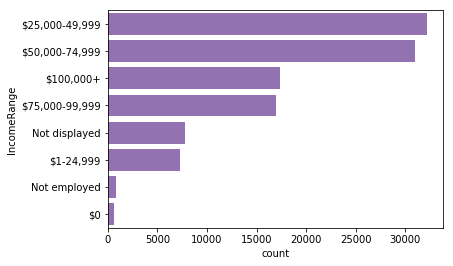

In [9]:
binsize = 10
base = sb.color_palette()[4]

#plt.figure(figsize=[8, 5])
sb.countplot(data = df, y = 'IncomeRange', color = base, order = df['IncomeRange'].value_counts().index)
#plt.xticks(rotation= 90)

This plot shows that the highest loans are taken out by people in the middle income distribution. Except a few outliers that have 0 income majority of the loans are to income group of 25k-75k and it dwindles at higher values which means that middle class earners need more loans.

(0, 2)

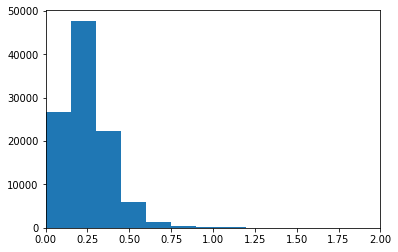

In [10]:
fig = plt.figure()


bin_s = np.arange(0,df.DebtToIncomeRatio.max()+0.15, 0.15)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bin_s)
plt.xlim(0,2)

#### > There are 200 odd values of debt to income ratio which are over 10 which were skewing the plot. It is clear that majority of the borrowers range from 0 to 0.4 debt to income ratio. There are very few count of loans given to clients with debt ratio higher than 2 but even if we consider the 100 additional borrowers between 2 and 3, the biggest anomaly is debt to ratio of 10.01 for 272 candidates. This seems like an anomaly that should be removed

In [11]:
#Exporting to csv to investigate and remove
dfd = df[df['DebtToIncomeRatio']>= 2]
dfd.to_csv('DebttoincomeOutliers.csv', index = False)

> 

(array([ 2169.,   930.,  2154.,  3728.,  6172.,  9510.,  9382.,  8731.,
        10227.,  7371.,  9440.,  5757.,  5940.,  5083.,  3722.,  4061.,
         3375.,  1987.,  1913.,  1223.,  2394.,   991.,   797.,   823.,
          489.,  1092.,   510.,   326.,   299.,   300.,   476.,   179.,
          133.,   422.,   161.]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000., 10500., 11000., 11500.,
        12000., 12500., 13000., 13500., 14000., 14500., 15000., 15500.,
        16000., 16500., 17000., 17500.]),
 <a list of 35 Patch objects>)

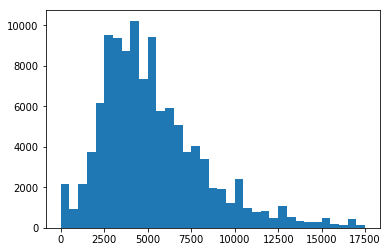

In [12]:
#Based on the above exploration it makes sense to analyze the monthly income stats
bin_size = np.arange(dfd.StatedMonthlyIncome.min(), dfd.StatedMonthlyIncome.max()+500, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bin_size)

Surprisingly most of the data with a monthly income of 0 seems to be accurate but it maybe safer to drop all data with  <1 StatedMonthly income and the income is unverified.
Binning  is a surprisingly effective method and really defines the visualization in a big, 500 seems to work great here but 200 produces thin spikes

In [91]:
df_mi = df[~((df['StatedMonthlyIncome']== 0) & (df['IncomeVerifiable']== False))]
df_mi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112607 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             112607 non-null object
ListingNumber                          112607 non-null int64
ListingCreationDate                    112607 non-null object
CreditGrade                            28306 non-null object
Term                                   112607 non-null int64
LoanStatus                             112607 non-null category
ClosedDate                             54046 non-null datetime64[ns]
BorrowerAPR                            112582 non-null float64
BorrowerRate                           112607 non-null float64
LenderYield                            112607 non-null float64
EstimatedEffectiveYield                84170 non-null float64
EstimatedLoss                          84170 non-null float64
EstimatedReturn                        84170 non-null float64
ProsperRating (numeric)                84170 non-null category
ProsperRati

In [92]:
# Removing all stated income below 1$ that is not verifiable
df = df[~((df['StatedMonthlyIncome']< 1) & (df['IncomeVerifiable']==False))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112375 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             112375 non-null object
ListingNumber                          112375 non-null int64
ListingCreationDate                    112375 non-null object
CreditGrade                            28079 non-null object
Term                                   112375 non-null int64
LoanStatus                             112375 non-null category
ClosedDate                             53816 non-null datetime64[ns]
BorrowerAPR                            112350 non-null float64
BorrowerRate                           112375 non-null float64
LenderYield                            112375 non-null float64
EstimatedEffectiveYield                84165 non-null float64
EstimatedLoss                          84165 non-null float64
EstimatedReturn                        84165 non-null float64
ProsperRating (numeric)                84165 non-null category
ProsperRati

([<matplotlib.axis.XTick at 0x19c6ac5fe48>,
 <a list of 7 Text xticklabel objects>)

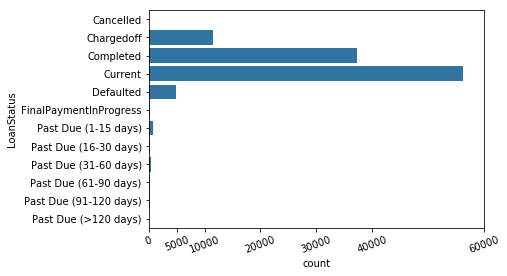

In [104]:
#bin_s = np.arange(df.LoanOriginalAmount.min(),df.LoanOriginalAmount.max()+1000, 1000)
#fig, ax = plt.subplots(nrows = 3, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanStatus', color = default_color)
plt.xticks(x_ticks,rotation = 20)

> This is a great portfolio of loans as it seems that most of the loans are current and completed and the number of default loans is less than 5000 out of 110000

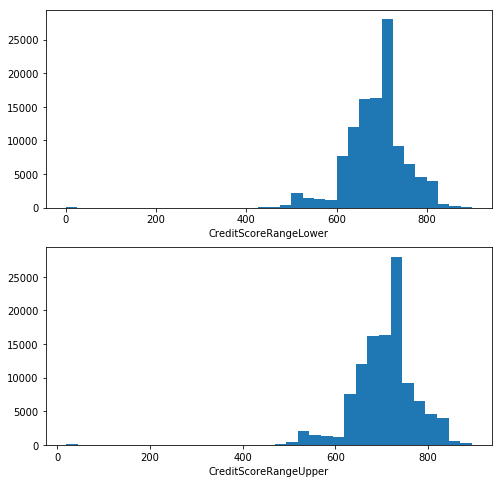

In [137]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

variables = ['CreditScoreRangeLower','CreditScoreRangeUpper']
for i in range(len(variables)):
    var = variables[i]
    bin_s = np.arange(min(df[var]), max(df[var])+25, 25)
    ax[i].hist(data = df, x =var, bins = bin_s)
    ax[i].set_xlabel('{}'.format(var))

The creditscore plot shows that majority of the loan applicants are between 600 to 8000 credit score range. This lies in the good to excellent category of credit risk which means that the loans are given out after performing these checks.

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1000e+01, 2.5000e+01, 1.5780e+03, 8.7750e+03, 1.4554e+04,
        1.7288e+04, 1.6122e+04, 1.4160e+04, 9.9460e+03, 1.1314e+04,
        7.4090e+03]),
 array([-0.1827, -0.1527, -0.1227, -0.0927, -0.0627, -0.0327, -0.0027,
         0.0273,  0.0573,  0.0873,  0.1173,  0.1473,  0.1773,  0.2073,
         0.2373,  0.2673,  0.2973]),
 <a list of 16 Patch objects>)

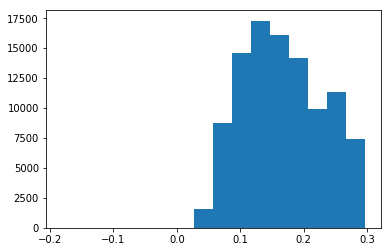

In [157]:
bin_s = np.arange(df.EstimatedReturn.min(),df.EstimatedReturn.max()+0.03, 0.03)
plt.hist(data =df, x='LenderYield', bins = bin_s)

> It can be seen from the plot of the estimated return that the margin on the loans ranges between 0.1 to 0.3 for the lender

(array([6.2550e+03, 1.1132e+04, 1.0089e+04, 1.6514e+04, 8.4530e+03,
        4.9930e+03, 6.4020e+03, 3.8790e+03, 2.8920e+03, 1.1659e+04,
        1.5160e+03, 2.5350e+03, 1.9360e+03, 9.5300e+02, 1.2512e+04,
        4.5300e+02, 6.3900e+02, 6.4300e+02, 4.3200e+02, 3.3340e+03,
        1.9400e+02, 2.8400e+02, 1.8100e+02, 2.4200e+02, 3.5760e+03,
        1.4000e+01, 2.2000e+01, 2.6000e+01, 2.0000e+00, 1.1100e+02,
        2.4000e+01, 2.7000e+01, 1.1000e+01, 4.4000e+02]),
 array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000,
        19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000,
        28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000],
       dtype=int64),
 <a list of 34 Patch objects>)

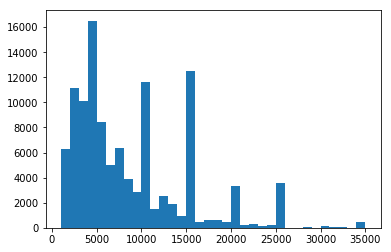

In [162]:
bin_s = np.arange(df.LoanOriginalAmount.min(),df.LoanOriginalAmount.max()+1000,1000)
plt.hist(data =df, x='LoanOriginalAmount', bins = bin_s)

> The plot for the original loan shows in terms of count the lower amount loans outnumber the loans at ahigher amounts. Also some of the spikes observed for round figures are quite expected as people tend to borrow in round figure amounts.

([<matplotlib.axis.XTick at 0x240ae1c7ba8>,
 <a list of 11 Text xticklabel objects>)

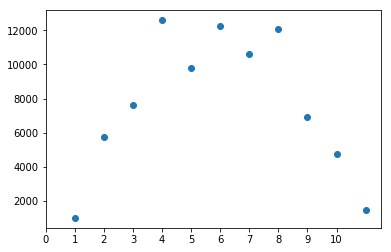

In [226]:
df_Score = df.groupby('ProsperScore').ProsperScore.count()
df_Score = df_Score.reset_index(name = 'Total')
plt.scatter(data=df_Score,x= 'ProsperScore', y= 'Total')
plt.xticks(np.arange(0,11,1))

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The overall distributions of the variables used to provide loans are as expected. The only anomalies found were in the debt to income ratio where some of the outlier were over 10 which were quite, the action taken was to delete the records that did not have a verifiable montly income as debt to income ratio is calculated based on the monthly income.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are a total of 81 features to be investigated, I have picked the ones that may be used to decide the outcome of the loan and may help decide if the loan maybe defaulted on. No feature seems to be useless outright, initially the GradeScore variable seemed low in number but a quick viewing showed that it is useful for variables where the prosper rating is not available. Some of the features dealing with credit score and the borrower history were not set as categorical data and changes had to be made to produce accurate plots. A lot of ordinal variables were set including credit score which helped in assessing the data. Also a quick indicated ProsperScore to be a good indicator of total loans give out as the medium range score has most loans given out and at lower rnages lesser loans are given out

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [6]:
numeric_vars = ['LoanOriginalAmount','LoanCurrentDaysDelinquent',\
                'EstimatedReturn','LP_NetPrincipalLoss','BorrowerAPR', 'AvailableBankcardCredit']
categorical_vars = ['ProsperScore', 'ProsperRating (numeric)', 'LoanStatus']

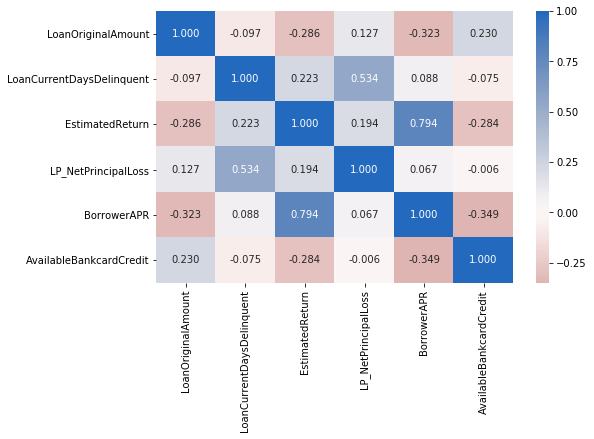

In [7]:
samples = np.random.choice(df.shape[0],2000,replace = False)
df_sample = df.loc[samples,:]
plt.figure(figsize=[8,5])
sb.heatmap(df[numeric_vars].corr(),annot=True, fmt = '.3f',
           cmap= 'vlag_r', center = 0)
plt.show()

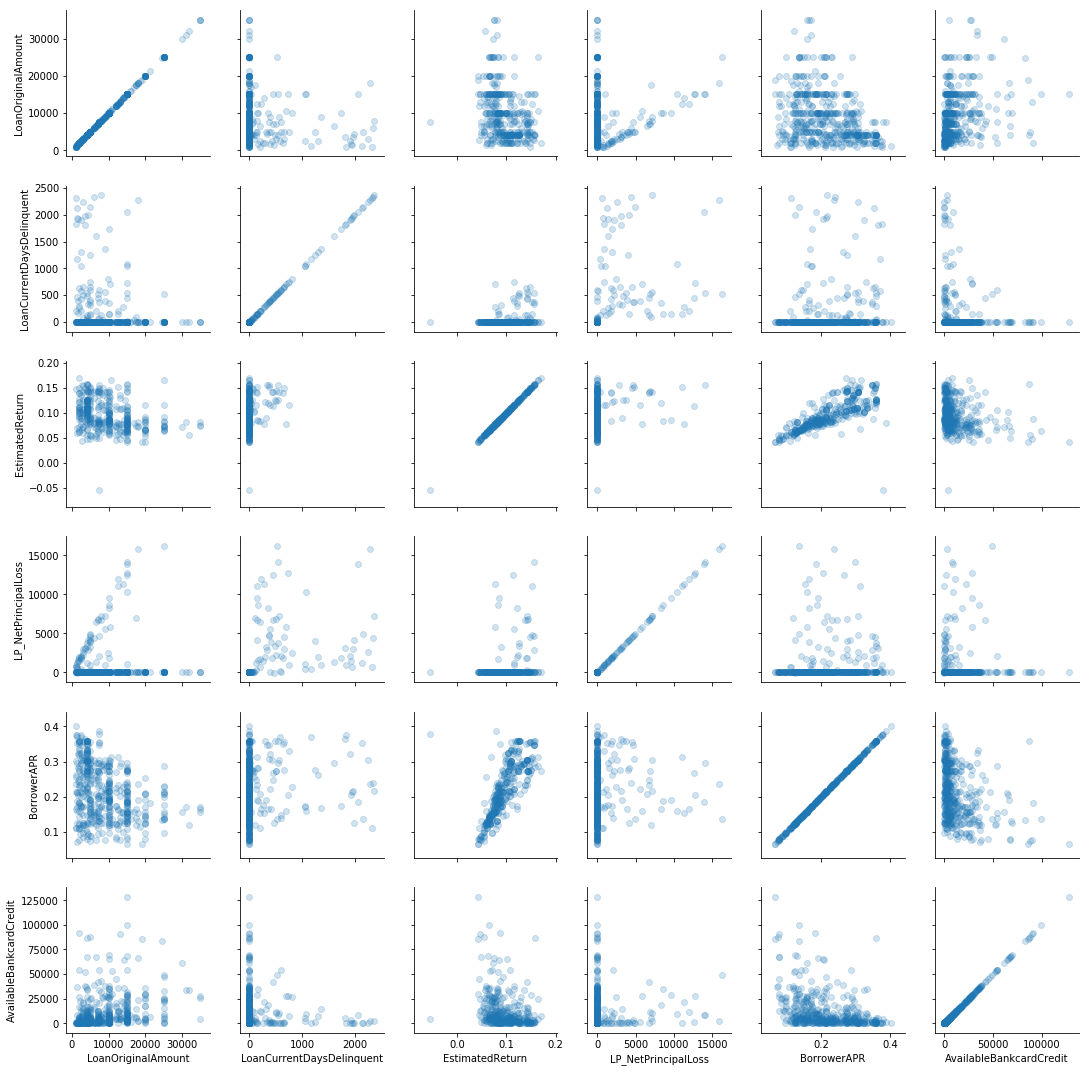

In [25]:
samples = np.random.choice(df.shape[0],500,replace = False)
df_sample = df.loc[samples,:]
base_color = sb.color_palette()[0]

g = sb.PairGrid(data = df_sample, vars = numeric_vars)
g = g.map(plt.scatter, alpha = 1/5)

C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

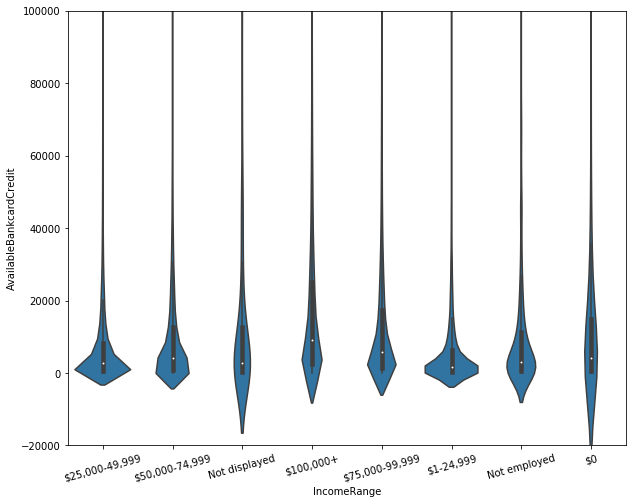

In [26]:
#'IncomeRange','LoanStatus',
samples = np.random.choice(df.shape[0],2000,replace = False)
df_sample = df.loc[samples,:]
base= sb.color_palette()[0]
plt.figure(figsize =[10,8])
sb.violinplot(data= df, x='IncomeRange', y= 'AvailableBankcardCredit', color= base_color)
plt.ylim(-20000,100000)
plt.xticks(rotation = 15)

<Figure size 720x864 with 0 Axes>

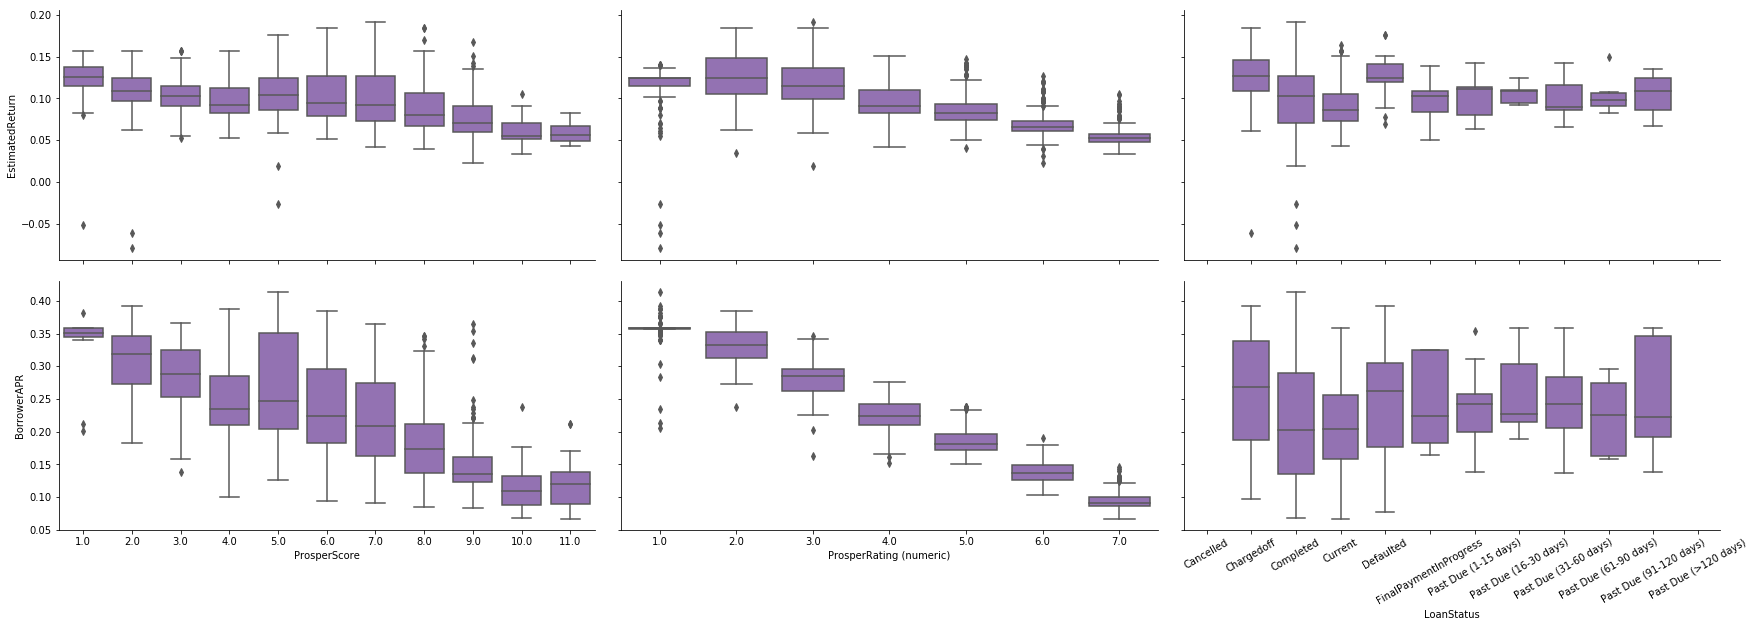

In [27]:
#Simulating plots of categorical vs numeric fields

sample = np.random.choice(df.shape[0],2000, replace = False)
df_samp = df.loc[sample,:]

def boxgrid(x,y,**kwargs):
    base = sb.color_palette()[4]
    sb.boxplot(x,y, color =base)
plt.figure(figsize = [10,12])
g= sb.PairGrid(data= df_samp, y_vars =['EstimatedReturn','BorrowerAPR']\
               ,x_vars = categorical_vars,height = 4, aspect = 2)
plt.xticks(rotation = 30)
g.map(boxgrid)
plt.show()

C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tupl

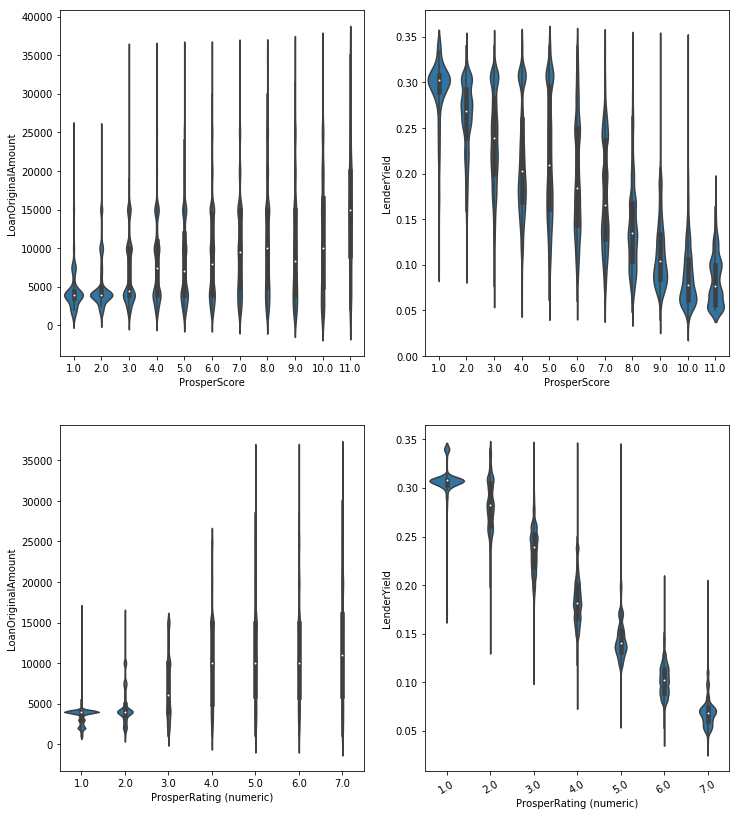

In [28]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=[12,14])
plt.xticks(rotation= 30)
categoric_vars = ['ProsperScore', 'ProsperRating (numeric)']
num = ['LoanOriginalAmount','LenderYield']

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df, x =var, y ='LoanOriginalAmount', color = base, ax= ax[i,0])
    
    sb.violinplot(data =df,x =var, y ='LenderYield', color = base, ax= ax[i,1] )

plt.show()

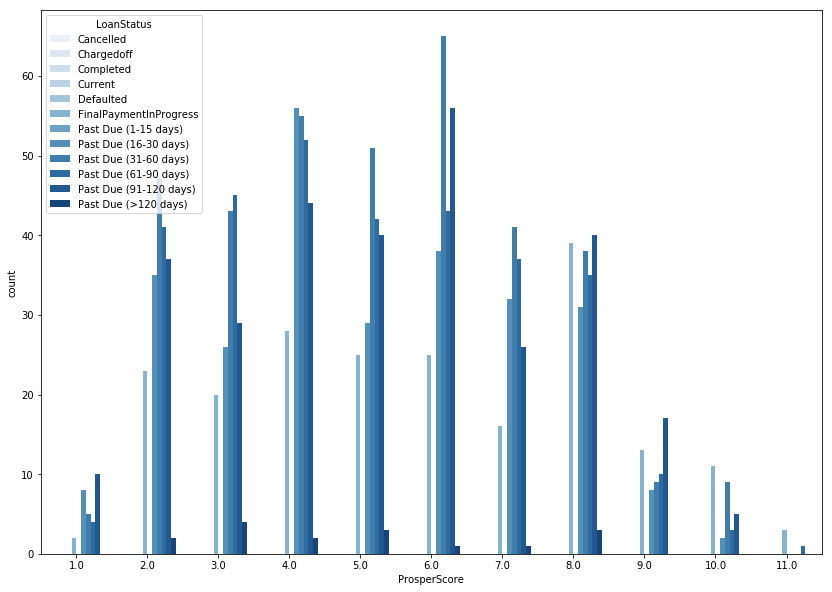

In [29]:
#Plotting Categorical Variables against Categorical Variables
#Here it makes sense to analyze only current loans, so creating a dataframe without completed and current.
#Also 1-15 days past due may not be serious cases so removing them as well

df_noncurrent = df[((df['LoanStatus'] != 'Current') & (df['LoanStatus']!= 'Completed') & \
                    (df['LoanStatus']!= 'Defaulted')&(df['LoanStatus']!= 'Past Due (1-15 days)')&\
                   (df['LoanStatus'] != 'Chargedoff') & (df['LoanStatus']!= 'Ccancelled'))]
plt.figure(figsize = [14,10])

sb.countplot(data= df_noncurrent, x= 'ProsperScore',hue ='LoanStatus',palette= 'Blues')
#plt.yticks([0,10,30,50,100,200,300,600,800,1000])



#plt.subplot(3,1,3)
#sb.countplot(data=df_samp, x ='LoanStatus', hue = 'CreditScoreRangeUpper',palette = 'Greens')

>The above chart shows that lower Prosper score borrwoers tend to have higher late payments on loans and this is excluding the one off 1-15 day late payment which could be due to forgetfulness. 

>The values for Prosper score 1 is low but it would merit to look at the number of loans for a 1 prosper score as that count should be siginificantly low. As shown below that is only 992 of the total 110000 loans whereas ProsperScore of 2 shows a significant increase in number

In [39]:
#df_noncurrent = df[((df['LoanStatus'] != 'Current') & (df['LoanStatus']!= 'Completed') & (df['LoanStatus']!= 'Past Due (1-15 days)'))]
plt.figure(figsize = [14,10])

df_CSR = df.groupby(['CreditScoreRangeLower','ProsperScore']).size()
df_CSR = df_CSR.reset_index(name = 'counts')
df_CSR = df_CSR.pivot(index ='CreditScoreRangeLower' , columns = 'ProsperScore', values = 'counts')
df_CSR.fillna(0,inplace = True)
df_CSR
#plt.scatter(data= df_CSR, x= 'CreditScoreRangeLower',y = 'ProsperScore', color = base)
#plt.yticks([0,10,30,50,100,200,300,600,800,1000])

ProsperScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
CreditScoreRangeLower,,,,,,,,,,,
600.0,142.0,145.0,146.0,159.0,154.0,123.0,84.0,50.0,33.0,4.0,0.0
620.0,119.0,246.0,246.0,249.0,280.0,197.0,127.0,127.0,47.0,15.0,0.0
640.0,223.0,865.0,1107.0,1658.0,895.0,1472.0,1099.0,1003.0,387.0,106.0,34.0
660.0,183.0,1202.0,1520.0,2917.0,1944.0,2196.0,1834.0,1404.0,564.0,269.0,100.0
680.0,112.0,1136.0,1482.0,2753.0,1823.0,2143.0,1834.0,1660.0,628.0,326.0,122.0
700.0,66.0,1022.0,1447.0,2168.0,1604.0,2160.0,1790.0,1788.0,869.0,478.0,218.0
720.0,34.0,614.0,811.0,1346.0,1299.0,1658.0,1532.0,1781.0,1127.0,570.0,262.0
740.0,54.0,298.0,492.0,671.0,867.0,1085.0,1026.0,1478.0,1053.0,611.0,236.0
760.0,36.0,160.0,221.0,402.0,509.0,644.0,598.0,1083.0,853.0,592.0,155.0


<Figure size 1008x720 with 0 Axes>

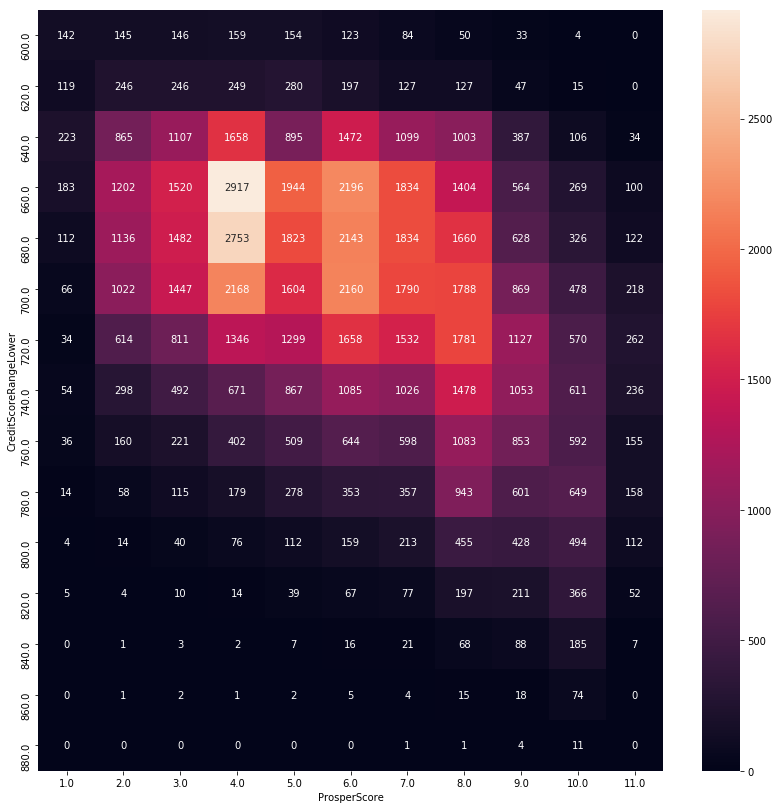

In [40]:
plt.figure(figsize= [14,14])
sb.heatmap(df_CSR, annot= True, fmt= '.0f')

In [41]:
df_counts = df.groupby(['ProsperScore', 'LoanStatus']).size()
df_counts = df_counts.reset_index(name = 'count')
df_counts = df_counts.pivot(index='ProsperScore',columns = 'LoanStatus',values = 'count')
df_counts.fillna(0,inplace = True)
df_counts

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)
ProsperScore,,,,,,,,,,,
1.0,235.0,341.0,337.0,37.0,2.0,13.0,8.0,5.0,4.0,10.0,0.0
2.0,377.0,848.0,4196.0,70.0,23.0,90.0,35.0,47.0,41.0,37.0,2.0
3.0,414.0,1077.0,5804.0,75.0,20.0,105.0,26.0,43.0,45.0,29.0,4.0
4.0,784.0,1828.0,9476.0,119.0,28.0,151.0,56.0,55.0,52.0,44.0,2.0
5.0,907.0,2212.0,6222.0,165.0,25.0,117.0,29.0,51.0,42.0,40.0,3.0
6.0,925.0,2847.0,7981.0,173.0,25.0,124.0,38.0,65.0,43.0,56.0,1.0
7.0,662.0,2357.0,7210.0,135.0,16.0,80.0,32.0,41.0,37.0,26.0,1.0
8.0,666.0,3711.0,7265.0,139.0,39.0,86.0,31.0,38.0,35.0,40.0,3.0
9.0,309.0,2836.0,3612.0,71.0,13.0,26.0,8.0,9.0,10.0,17.0,0.0


In [42]:
df_counts['Late_Loans'] = df_counts['Past Due (1-15 days)']+ df_counts['Past Due (16-30 days)']+ df_counts['Past Due (31-60 days)']+\
                          df_counts['Past Due (61-90 days)'] + df_counts['Past Due (91-120 days)']+ df_counts['Past Due (>120 days)']                       
#Calculate Percentage of Bad Loans
df_Late = df_counts.drop(['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)',\
                          'Past Due (>120 days)'], axis =1)
df_Late['PercentageBadLoans']= df_Late['Late_Loans']/(df_Late.Chargedoff+df_Late.Completed+df_Late.Current+df_Late.Defaulted+df_Late.FinalPaymentInProgress)*100
df_Late

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Late_Loans,PercentageBadLoans
ProsperScore,,,,,,,
1.0,235.0,341.0,337.0,37.0,2.0,40.0,4.201681
2.0,377.0,848.0,4196.0,70.0,23.0,252.0,4.570185
3.0,414.0,1077.0,5804.0,75.0,20.0,252.0,3.410014
4.0,784.0,1828.0,9476.0,119.0,28.0,360.0,2.942378
5.0,907.0,2212.0,6222.0,165.0,25.0,282.0,2.958766
6.0,925.0,2847.0,7981.0,173.0,25.0,327.0,2.736173
7.0,662.0,2357.0,7210.0,135.0,16.0,217.0,2.090559
8.0,666.0,3711.0,7265.0,139.0,39.0,233.0,1.971235
9.0,309.0,2836.0,3612.0,71.0,13.0,70.0,1.023242


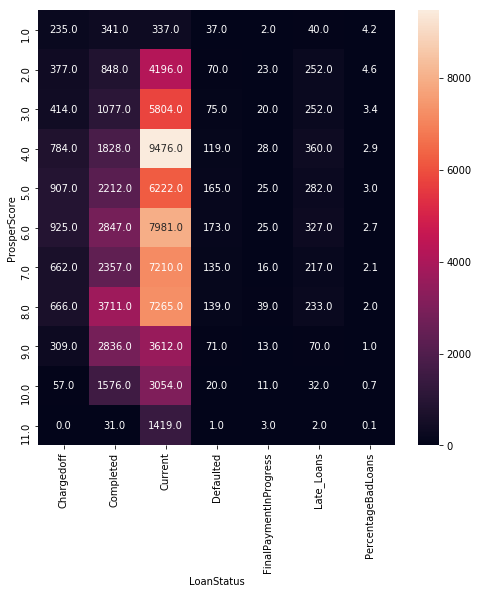

In [43]:
plt.figure(figsize= [8,8])
sb.heatmap(df_Late, annot= True, fmt= '.1f')

In [85]:
df_Percentage = df_Late.copy()
df_Percentage

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Late_Loans,PercentageBadLoans
ProsperScore,,,,,,,
1.0,235.0,341.0,337.0,37.0,2.0,40.0,4.201681
2.0,377.0,848.0,4196.0,70.0,23.0,252.0,4.570185
3.0,414.0,1077.0,5804.0,75.0,20.0,252.0,3.410014
4.0,784.0,1828.0,9476.0,119.0,28.0,360.0,2.942378
5.0,907.0,2212.0,6222.0,165.0,25.0,282.0,2.958766
6.0,925.0,2847.0,7981.0,173.0,25.0,327.0,2.736173
7.0,662.0,2357.0,7210.0,135.0,16.0,217.0,2.090559
8.0,666.0,3711.0,7265.0,139.0,39.0,233.0,1.971235
9.0,309.0,2836.0,3612.0,71.0,13.0,70.0,1.023242


In [87]:
df_Percentage.drop(['Chargedoff','Completed','Current','Defaulted','FinalPaymentInProgress','Late_Loans'], inplace = True, axis =1)
df_Percentage

LoanStatus,PercentageBadLoans
ProsperScore,
1.0,4.201681
2.0,4.570185
3.0,3.410014
4.0,2.942378
5.0,2.958766
6.0,2.736173
7.0,2.090559
8.0,1.971235
9.0,1.023242


Text(0.5,1,'Percentage of Bad Loans based on Prosper Score')

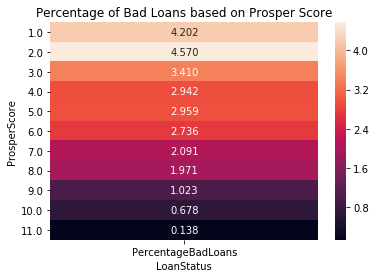

In [93]:
#df_Percentage = df_Percentage.reset_index(name = 'PercentageBadLoans')
sb.heatmap(df_Percentage, annot= True, fmt= '.3f')
plt.title("Percentage of Bad Loans based on Prosper Score")

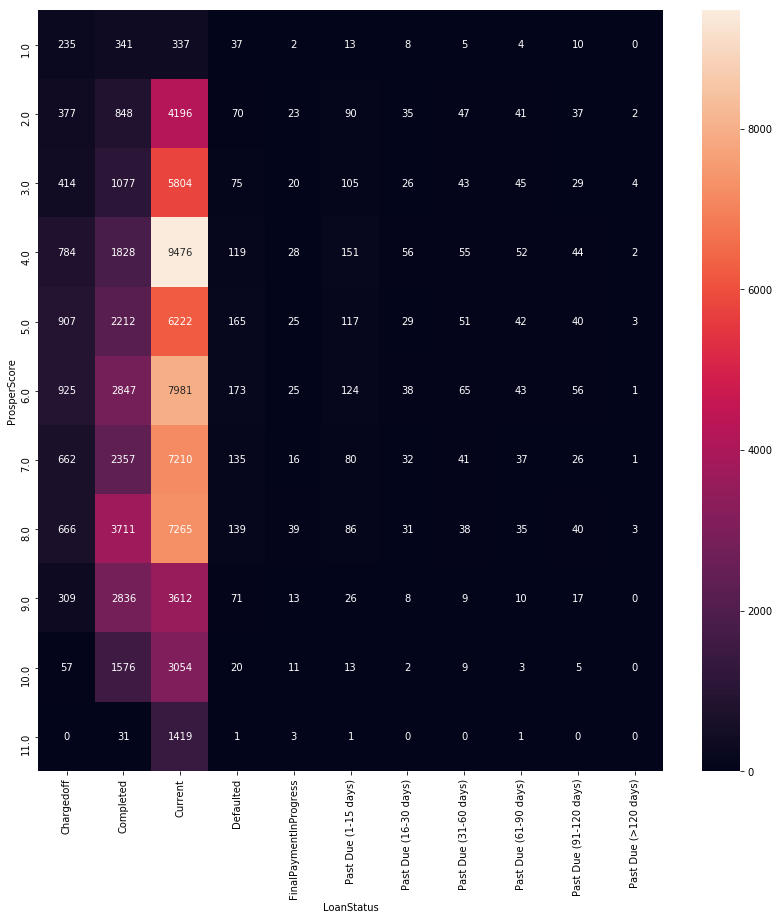

In [117]:
plt.figure(figsize= [14,14])
sb.heatmap(df_counts, annot= True, fmt= '.0f')

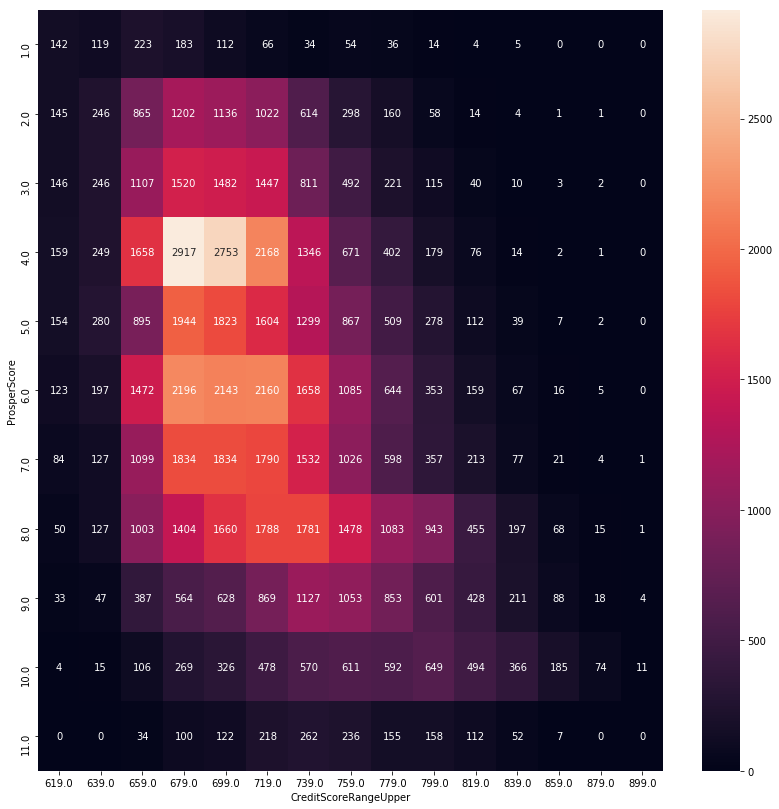

In [60]:
df_counts = df.groupby(['ProsperScore','CreditScoreRangeUpper']).size()
df_counts = df_counts.reset_index(name = 'count')
df_counts = df_counts.pivot(index='ProsperScore', columns ='CreditScoreRangeUpper',values = 'count')
df_counts.fillna(0,inplace = True)

plt.figure(figsize= [14,14])
sb.heatmap(df_counts, annot= True, fmt= '.0f')

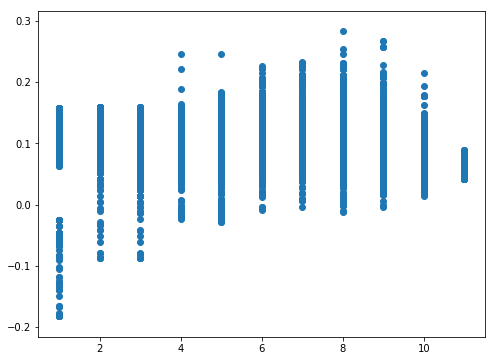

In [260]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'ProsperScore', y = 'EstimatedReturn')

(0, 40000)

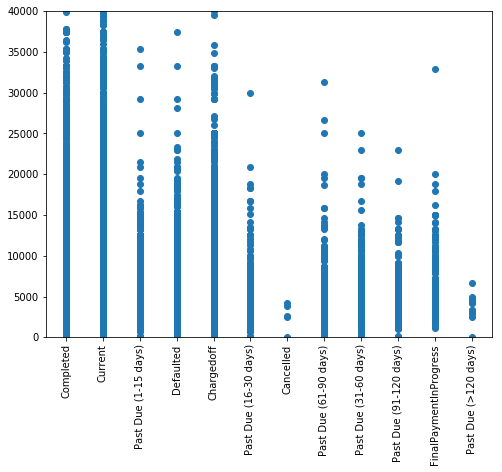

In [278]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'LoanStatus', y = 'StatedMonthlyIncome')
plt.xticks(rotation = 90)
plt.ylim(0,40000)

1. it is clear that there is no late payments for anybody with an extremely high income. So capping the monthly income at 40000 gets us a clearer picture that stated monthly income of less than 20000 is more prone to late payments.
2. Defaulted payments also go down with a higher monthly income
3. Significantly low income leads to cancelled and more loans past due 120 days.

In [ ]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'ProsperScore',y = 'BorrowerAPR')

In [ ]:
#ProsperScore vs creditscore details
df.groupby('ProsperScore')['CreditScoreRangeUpper'].mean()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. The variables chosen in univariate exploration proved useful in proving the hypothesis about loans that have been previously known. Specially ProsperScore and StatedMonthlyIncome are reliable pointers to the quality of a loan.
2. It was difficult to bivariate plots as the quantity of data was huge and samples had to be used in certain cases.
3. The trickiest part of this exploration was converting some of the categorical variables and contrasting the ones that were of use. It took multiple iterations to zero in on the exact variables.
4. The numeric variables in this dataset are not as such related to each other but the categorical variables are closely related and used to disburse the loans per the observations of the data.
5. The amount of data collected for loan adjudication is also quite surprising and comprehensive in terms of the finances of the individual 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. The EstimatedReturns are directly related to Borrower APR which is expected as higher the rate, higher the returns for the bank.
2. There is a clear correlation between low incomes and loan defaults, low Prosper Score to late payments and defaults.
3. ProsperScore turns out to be a good indicator of a good borrower or if the risk profile of the borrower is high. prosperScore seems to have a direct relation to credit score rating where higher scores having higher credit rating.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\nandayu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

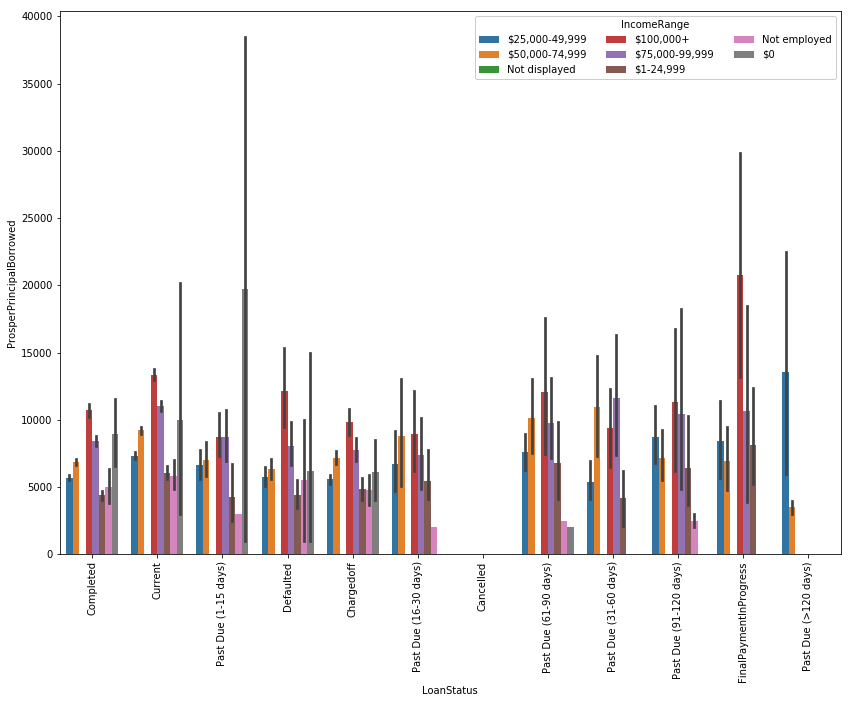

In [107]:
plt.figure(figsize = [14,10])
ax = sb.barplot(data = df, x = 'LoanStatus', y = 'ProsperPrincipalBorrowed', hue = 'IncomeRange')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'IncomeRange')
plt.xticks(rotation = 90)

In [132]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)
    bins_y = np.arange(0, df['EstimatedLoss'].max()+0.01, 0.01)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

C:\Users\nandayu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


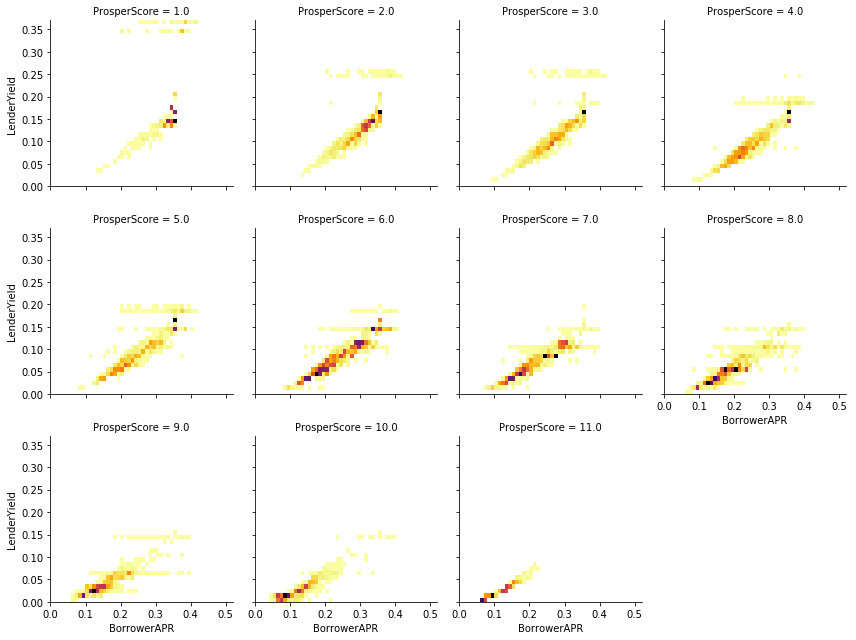

In [133]:
g = sb.FacetGrid(data = df, col = 'ProsperScore', col_wrap = 4, size = 3)
g.map(hist2dgrid, 'BorrowerAPR','EstimatedLoss', color = 'inferno_r')
g.set_ylabels('LenderYield')
g.set_xlabels('BorrowerAPR')
plt.show()

C:\Users\nandayu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


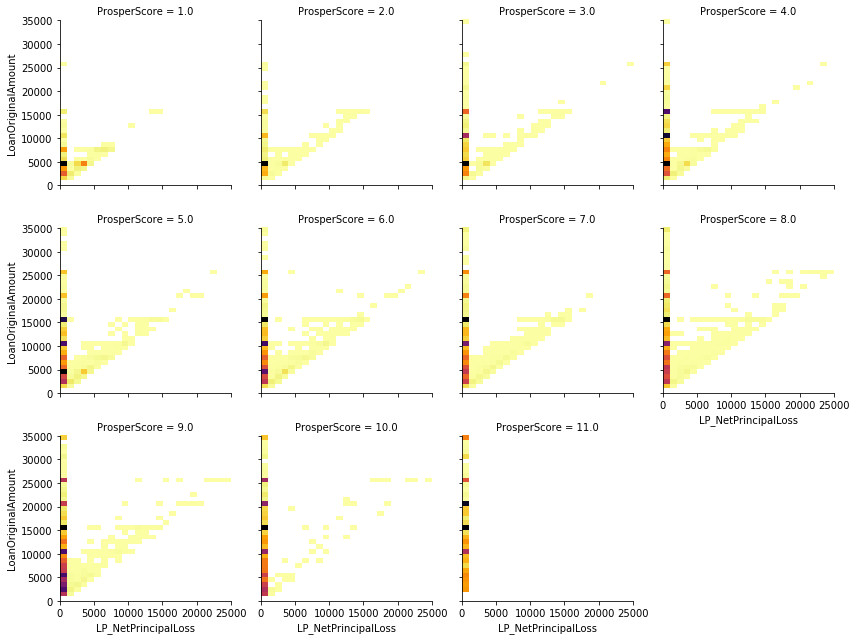

In [141]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, df['LP_NetPrincipalLoss'].max()+1000, 1000)
    bins_y = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

g = sb.FacetGrid(data = df, col = 'ProsperScore', col_wrap = 4, size = 3)
g.map(hist2dgrid, 'LP_NetPrincipalLoss','LoanOriginalAmount', color = 'inferno_r')
#g.set_xlabels('LenderYield')
#g.set_ylabels('ProsperSCore')
plt.show()

C:\Users\nandayu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\nandayu\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\nandayu\Anaconda3\lib\site-packages\matplotlib\image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\nandayu\Anaconda3\lib\site-packages\matplotlib\image.py:413: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\nandayu\Anaconda3\lib\site-packages\matplotlib\image.py:418: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\nandayu\Anaconda3\lib\site-packages\matplotlib\colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Use

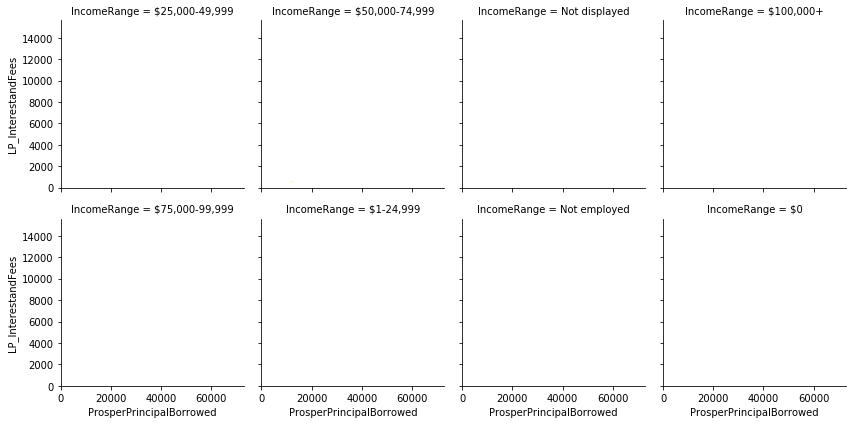

In [163]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, df['ProsperPrincipalBorrowed'].max()+1000, 1000)
    bins_y = np.arange(0, df['LP_InterestandFees'].max()+0.01, 0.01)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

g = sb.FacetGrid(data = df, col = 'IncomeRange', col_wrap = 4, size = 3)
g.map(hist2dgrid, 'ProsperPrincipalBorrowed','LP_InterestandFees', color = 'inferno_r')
#g.set_xlabels('LenderYield')
#g.set_ylabels('ProsperSCore')
plt.show()

In [ ]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'clarity', y = 'price', hue = 'cut',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('0.3-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')
plt.yscale('log')
plt.yticks([4e2, 6e2, 1e3], ['400', '600', '1000'])
ax.set_yticklabels([],minor = True)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!